In [17]:
import pandas as pd
import numpy as np
import math
import scipy.stats as stats
from scipy.stats import norm
import matplotlib.pyplot as plt
b = pd.read_csv("GPS_GUI_Data_2023-04-29_08:40:21_PR.csv")
min_b = min(b["Pressure (Pa)"])
min_b
b["Pressure (Pa)"] = b["Pressure (Pa)"]-min_b
b["Pressure (Pa)"]


0         3.366728
1         3.127355
2         2.885205
3         3.286341
4         3.340110
           ...    
1253    462.577184
1254    459.124891
1255    456.330565
1256    453.686263
1257    449.808005
Name: Pressure (Pa), Length: 1258, dtype: float64

In [18]:
b = b.rename(columns={'Pressure (Pa)': 'Altitude(m)'})
b

,Epoch time,Latitude,Longitude,Altitude(m),Radiation (cps)
0,1.682783e+09,37.864146,-122.314113,3.366728,26.6
1,1.682783e+09,37.864145,-122.314111,3.127355,24.8
2,1.682783e+09,37.864145,-122.314121,2.885205,22.4
3,1.682783e+09,37.864178,-122.314155,3.286341,24.2
4,1.682783e+09,37.864160,-122.314125,3.340110,26.8
...,...,...,...,...,...
1253,1.682796e+09,37.874873,-122.224283,462.577184,20.8
1254,1.682796e+09,37.874873,-122.224283,459.124891,18.2
1255,1.682796e+09,37.874873,-122.224283,456.330565,15.2
1256,1.682796e+09,37.874873,-122.224283,453.686263,16.2


In [20]:
frequency = b["Altitude(m)"].value_counts()
b["Frequency"] = b["Altitude(m)"].map(frequency)
print(b)

        Epoch time   Latitude   Longitude  Altitude(m)  Radiation (cps)  \
0     1.682783e+09  37.864146 -122.314113     3.366728             26.6   
1     1.682783e+09  37.864145 -122.314111     3.127355             24.8   
2     1.682783e+09  37.864145 -122.314121     2.885205             22.4   
3     1.682783e+09  37.864178 -122.314155     3.286341             24.2   
4     1.682783e+09  37.864160 -122.314125     3.340110             26.8   
...            ...        ...         ...          ...              ...   
1253  1.682796e+09  37.874873 -122.224283   462.577184             20.8   
1254  1.682796e+09  37.874873 -122.224283   459.124891             18.2   
1255  1.682796e+09  37.874873 -122.224283   456.330565             15.2   
1256  1.682796e+09  37.874873 -122.224283   453.686263             16.2   
1257  1.682796e+09  37.874873 -122.224283   449.808005             16.8   

      Frequency  
0             1  
1             1  
2             1  
3             1  
4        

In [5]:
plt.hist(b["Radiation (cps)"], label = "Radiation", density = True,bins = 45)
plt.ylabel("Frequency")
plt.xlabel("Radiation and Altitude")
mean = np.mean(b["Radiation (cps)"])
sd = np.std(b["Radiation (cps)"])
x = np.linspace(mean-3*sd,mean+3*sd,100)
uncertainty = sd/math.sqrt(1257)
plt.plot(x, stats.norm.pdf(x,mean,sd),label = "Radiation")
plt.hist(b["Altitude(m)"],label = "Altitude", density = True,bins = 15)
plt.title("Altitude and Radiation v Frequency")
plt.ylabel("Frequency")
plt.xlabel("Altitude")
mean1 = np.mean(b["Altitude(m)"])
sd1 = np.std(b["Altitude(m)"])
mean_uncertainty1 = sd/math.sqrt(1257)
x1 = np.linspace(mean-3*sd,mean+3*sd,100)
plt.plot(x1, stats.norm.pdf(x1,mean1,sd1),label = "Altitude")
plt.legend(loc = "upper right")
plt.show() 




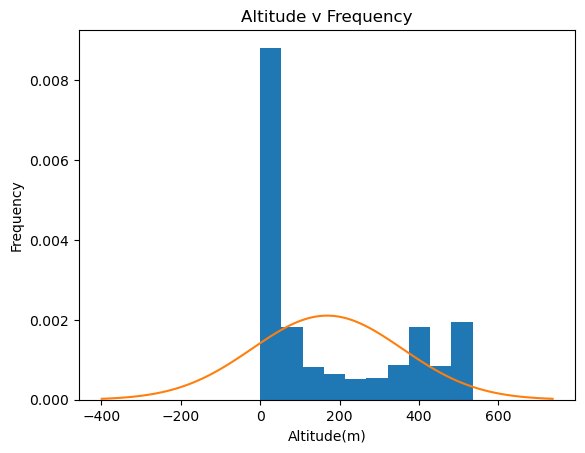

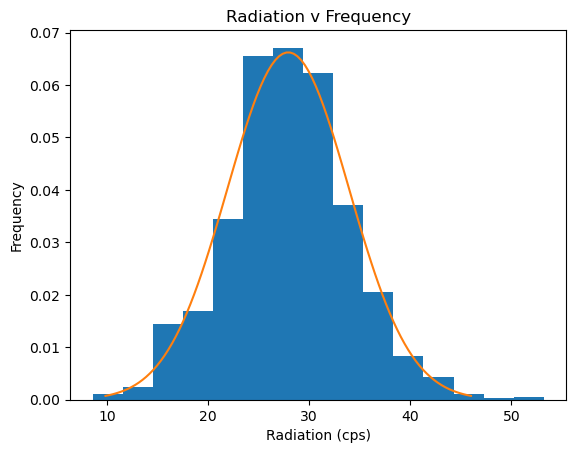

Altitude Mean: 168.83544436733885 Altitude SD: 189.4329743433158 Altitude Uncertainty: 5.340909975918963
Radiation Mean: 27.92829888712242 Radiation SD: 6.02417312268641 Radiation Uncertainty: 0.16984670403426005


In [21]:
plt.hist(b["Altitude(m)"], density = True)
plt.title("Altitude v Frequency")
plt.ylabel("Frequency")
plt.xlabel("Altitude(m)")
mean = np.mean(b["Altitude(m)"])
sd = np.std(b["Altitude(m)"])
mean_uncertainty = sd/math.sqrt(1258)
x = np.linspace(mean-3*sd,mean+3*sd,100)
plt.plot(x, stats.norm.pdf(x,mean,sd))
plt.show() #This is not a gaussian distribution.
plt.hist(b["Radiation (cps)"], density = True, bins = 15)
plt.title("Radiation v Frequency")
plt.ylabel("Frequency")
plt.xlabel("Radiation (cps)")
mean1 = np.mean(b["Radiation (cps)"])
sd1 = np.std(b["Radiation (cps)"])
mean1_uncertainty = sd1/math.sqrt(1258)
x = np.linspace(mean1-3*sd1,mean1+3*sd1,100)
plt.plot(x, stats.norm.pdf(x,mean1,sd1))
plt.show()
print("Altitude Mean: "+ str(mean),"Altitude SD: "+str(sd),"Altitude Uncertainty: "+str(mean_uncertainty))
print("Radiation Mean: "+str(mean1),"Radiation SD: "+str(sd1),"Radiation Uncertainty: "+str(mean1_uncertainty))

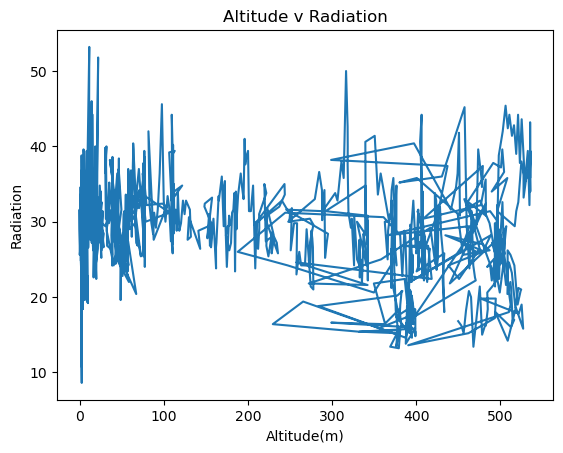

In [23]:
plt.title("Altitude v Radiation")
plt.plot(b["Altitude(m)"],b["Radiation (cps)"])
plt.xlabel("Altitude(m)")
plt.ylabel("Radiation")
plt.show()  #Radiation has a Gaussian distribution but Pressure does not have a Gaussian distribution

-0.10976700986005498

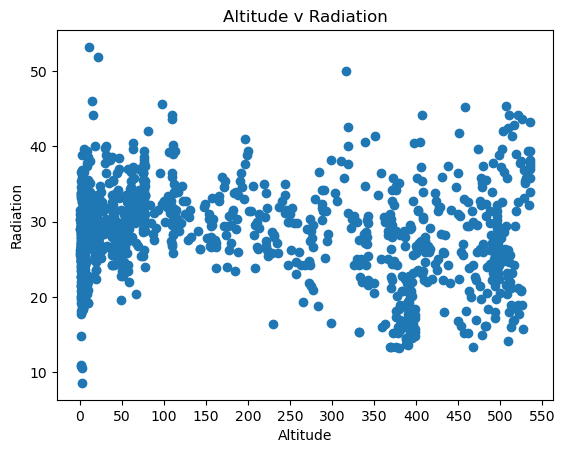

In [24]:
plt.scatter(b["Altitude(m)"],b["Radiation (cps)"])
coef = np.corrcoef(b["Altitude(m)"],b["Radiation (cps)"])[0,1] #finds correlation coefficient of Pressure and Radiation
plt.xticks(np.arange(0, 600, 50))
plt.gca().set_xticklabels([0,50,100,150,200,250,300,350,400,450,500,550]) # changes axis labeling of the scatter plot 
plt.title("Altitude v Radiation")
plt.xlabel("Altitude")
plt.ylabel("Radiation")
coef


In [9]:
#This does not show a strong correlation between pressure and radiation. This result is consistent with the line graph.


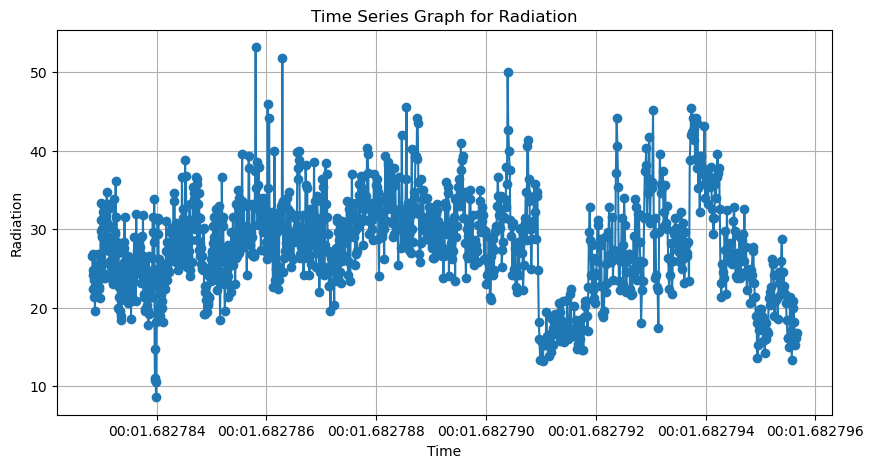

In [25]:
data = {'time': b["Epoch time"],'value': b["Radiation (cps)"]}
nl = pd.DataFrame(data)
nl['time'] = pd.to_datetime(nl['time'])
nl.set_index('time', inplace=True)
plt.figure(figsize=(10,5))
plt.plot(nl.index,nl['value'],marker = 'o')
plt.xlabel('Time')
plt.ylabel('Radiation')
plt.title('Time Series Graph for Radiation')
plt.grid()
plt.show()